# Amplitude Envelope

In [ ]:
!conda install -c conda-forge librosa 
# or
!pip install librosa

## Import libraries

In [1]:
import librosa
import librosa.display #for plotting
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

## load audio files

In [2]:
audio1 = 'audio/audio1.wav'
audio2 = 'audio/audio3.wav'

In [3]:
ipd.Audio(audio1)

In [4]:
ipd.Audio(audio2)

In [5]:
# resamples to sampling rate sr=22050 by default when loading
# returns audio time series and audio sample

In [6]:
audio1, sr = librosa.load(audio1)
audio2, sr1 = librosa.load(audio2)

In [7]:
type(audio1)

numpy.ndarray

In [8]:
audio1

array([-4.1033570e-07,  5.9295995e-05,  1.9787694e-04, ...,
        3.7430669e-05,  3.1230880e-05,  5.8018057e-05], dtype=float32)

## visualize the audio signal

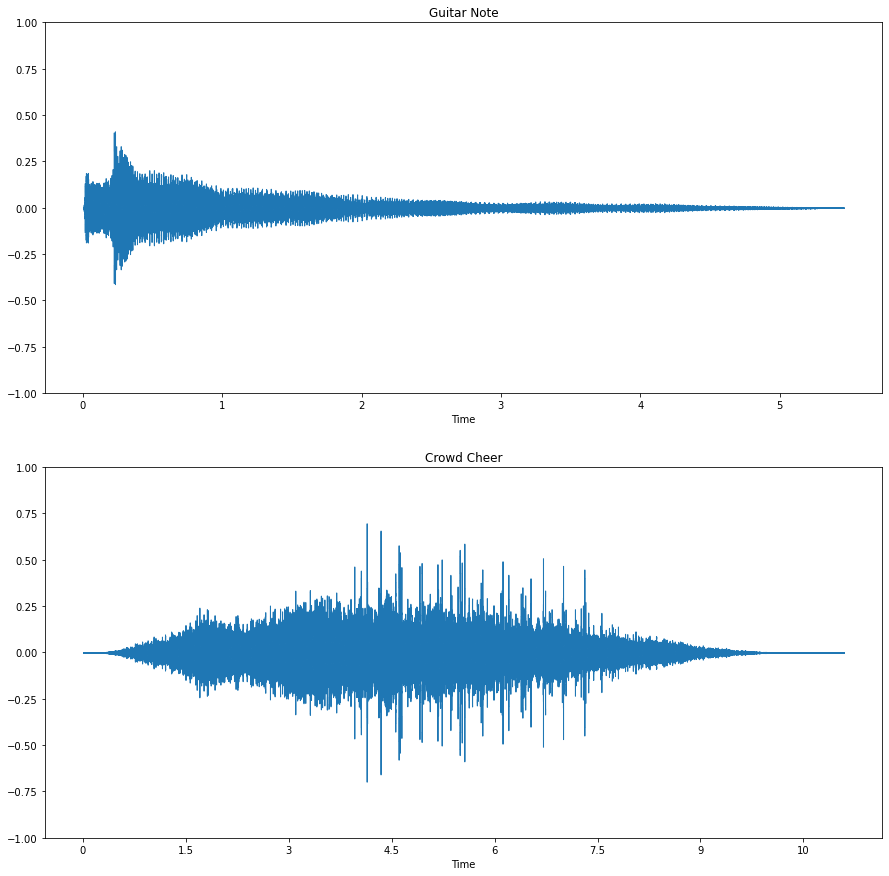

In [9]:
plt.figure(figsize=(15, 15))

plt.subplot(2, 1, 1)
plt.title("Guitar Note")
librosa.display.waveshow(audio1) # librosa.display.waveplot deprecated
plt.ylim((-1, 1))

plt.subplot(2, 1, 2)
plt.title("Crowd Cheer")
librosa.display.waveshow(audio2)
plt.ylim((-1, 1))

plt.show()

## Calculate the Amplitude Envelope

$$AE(t) = \max_{k=t.K}^{(t+1).K - 1} s(k)$$

In [10]:
FRAME_SIZE = 1024 # power of 2

# calculate the amplitude envelope
def amplitude_envelope(signal, frame_size):
    amplitude_envelop = []
    
    #calculate AE for each frame
    for i in range(0, len(signal), FRAME_SIZE):
        current_frame_amplitude_envelop = max(signal[i:i+frame_size])
        amplitude_envelop.append(current_frame_amplitude_envelop)
        
    return np.array(amplitude_envelop)

In [12]:
ae_audio1 = amplitude_envelope(audio1, FRAME_SIZE)
ae_audio2 = amplitude_envelope(audio2, FRAME_SIZE)

## visualize the AE for all audio files

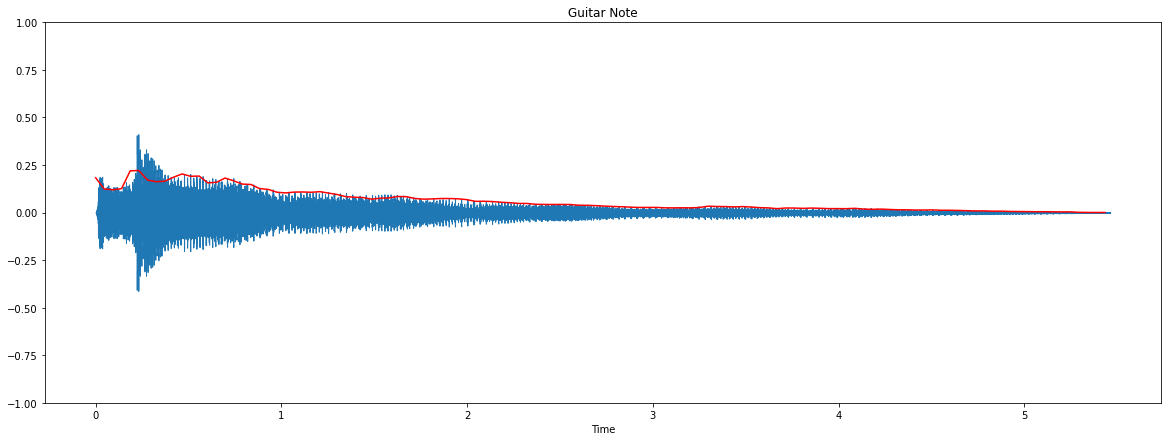

In [19]:
frames = range(0, ae_audio1.size)
t = librosa.frames_to_time(frames, hop_length=FRAME_SIZE)

plt.figure(figsize=(20, 7))

librosa.display.waveshow(audio1) 
plt.plot(t, ae_audio1, color="r")
plt.title("Guitar Note")
plt.ylim((-1, 1))

plt.show()

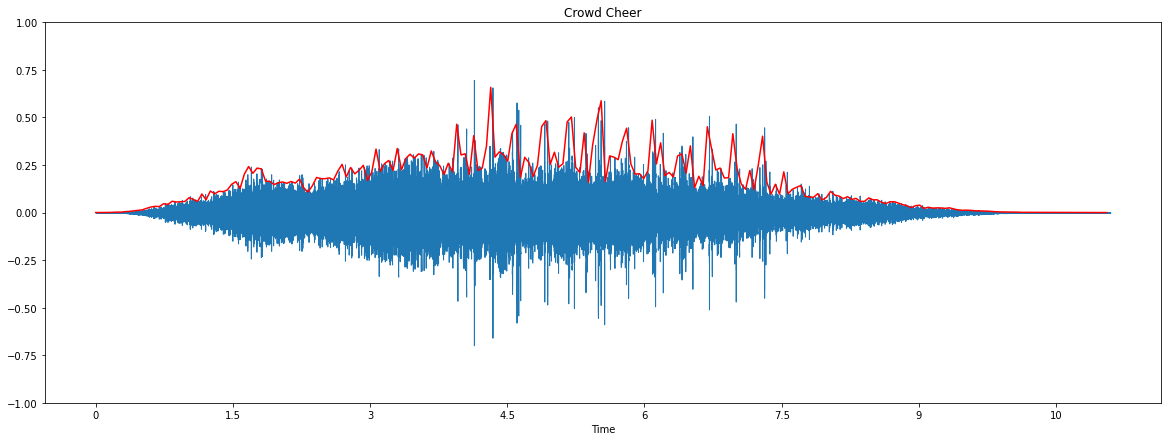

In [21]:
frames = range(0, ae_audio2.size)
t = librosa.frames_to_time(frames, hop_length=FRAME_SIZE)

plt.figure(figsize=(20, 7))

librosa.display.waveshow(audio2) 
plt.plot(t, ae_audio2, color="r")
plt.title("Crowd Cheer")
plt.ylim((-1, 1))

plt.show()